In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "train.csv"

In [4]:
data = pd.read_csv(path)  
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

/home/valter/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/valter/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


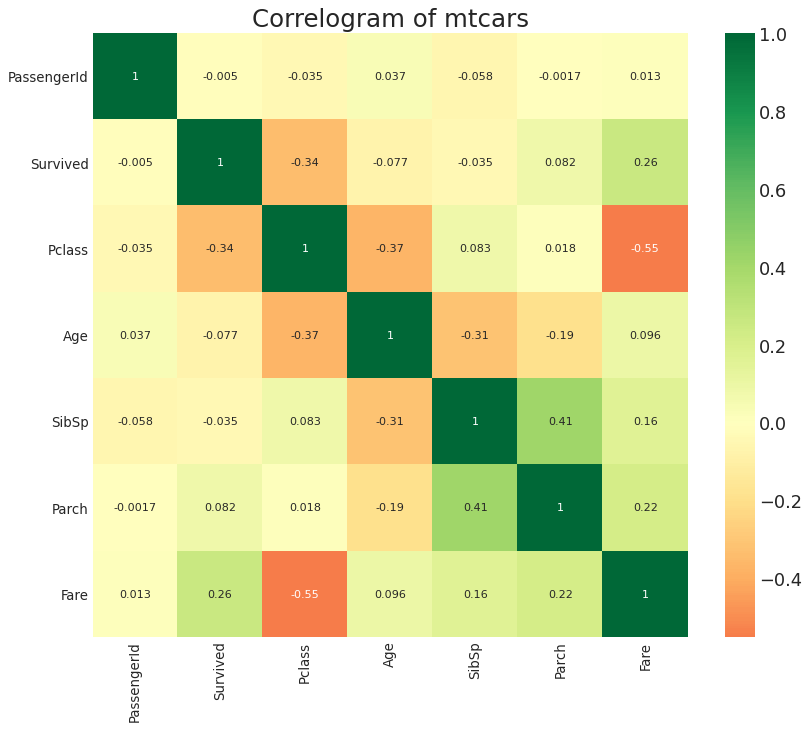

In [138]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:

def get_data(data):
    data = data.drop(["PassengerId", "Name", "Ticket"], axis=1)

    # data['Pclass'] = data['Pclass']/3

    # data['Age'] = data['Age'] / 80.0

    data.loc[data['SibSp']>0, ('SibSp')] = 1 
    data.loc[data['Parch']>0, ('Parch')] = 1 

    data = data.fillna(40)

    data[">45"] = [1 if x > 45 else 0 for x in data['Age']]
    data[">25"] = [1 if x > 25 and x <= 45 else 0 for x in data['Age']]
    data["<=25"] = [1 if x <= 25 else 0 for x in data['Age']]

    data['Fare'] = data ['Fare'] / 512.3292

    data['C'] = [1 if x == 'C' else 0 for x in data["Embarked"]]
    data['Q'] = [1 if x == 'Q' else 0 for x in data["Embarked"]]
    data['S'] = [1 if x == 'S' else 0 for x in data["Embarked"]]


    data['c1'] = [1 if x == 1 else 0 for x in data['Pclass']]
    data['c2'] = [1 if x == 2 else 0 for x in data['Pclass']]
    data['c3'] = [1 if x == 3 else 0 for x in data['Pclass']]

    data = data.drop(["Cabin",  'Age', "Embarked"], axis=1)
    data = data.replace({"Sex":{'male': 1, "female": 0}})
    return data

In [19]:
data = pd.read_csv(path)  
y = data['Survived']
data = get_data(data)

data = data.drop(["Survived"], axis=1)

In [11]:
data

,Pclass,Sex,SibSp,Parch,Fare,>45,>25,<=25,C,Q,S,c1,c2,c3
0,3,1,1,0,0.014151,0,0,1,0,0,1,0,0,1
1,1,0,1,0,0.139136,0,1,0,1,0,0,1,0,0
2,3,0,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,1,0,1,0,0.103644,0,1,0,0,0,1,1,0,0
4,3,1,0,0,0.015713,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,0.025374,0,1,0,0,0,1,0,1,0
887,1,0,0,0,0.058556,0,0,1,0,0,1,1,0,0
888,3,0,1,1,0.045771,0,1,0,0,0,1,0,0,1
889,1,1,0,0,0.058556,0,1,0,1,0,0,1,0,0


In [20]:
logistic = LogisticRegression()
X = (np.asarray(data))
Y = (np.asarray(y)) 
logistic.fit(X, Y)
logistic.score(X, Y) 
print('R² Value: \n', logistic.score(X, Y))

R² Value: 
 0.7822671156004489


In [21]:
end = pd.read_csv('test.csv')
 
id = end["PassengerId"]

end = get_data(end)

In [22]:
prediction = logistic.predict(end)
# prediction = np.reshape(prediction, (-1, 1))

In [23]:
end = pd.DataFrame({"PassengerId":id, "Survived":prediction})
end.to_csv("end.csv", index=False)

In [142]:
data.describe()

/home/valter/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pclass,Sex,SibSp,Parch,Fare,>45,>25,<=25,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.769547,0.647587,0.317621,0.239057,0.062858,0.115600,0.546577,0.337823,0.188552,0.086420,0.722783
std,0.278690,0.477990,0.465813,0.426747,0.096995,0.319925,0.498105,0.473233,0.391372,0.281141,0.447876
min,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
